In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

2025-11-04 03:45:47.546471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762227947.755764      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762227947.823115      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load data harga saham BBCA.JK
data = pd.read_csv('/kaggle/input/bbca-stock-market/Download Data - STOCK_ID_XIDX_BBCA.csv')
# Remove commas from numeric columns and convert to numeric
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data[col] = data[col].astype(str).str.replace(',', '', regex=False)
    data[col] = pd.to_numeric(data[col])

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,10/01/2025,7600,7675,7500,7500,202433406
1,09/30/2025,7700,7775,7625,7625,170666703
2,09/29/2025,7750,7800,7700,7775,116454703
3,09/26/2025,7575,7700,7575,7625,121657695
4,09/25/2025,7725,7775,7700,7700,147986594


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    232 non-null    object
 1   Open    232 non-null    int64 
 2   High    232 non-null    int64 
 3   Low     232 non-null    int64 
 4   Close   232 non-null    int64 
 5   Volume  232 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.0+ KB


In [5]:
# Hapus kolom yang tidak digunakan
data.drop(['Date'], axis=1, inplace=True)

In [6]:
data.head()

,Open,High,Low,Close,Volume
0,7600,7675,7500,7500,202433406
1,7700,7775,7625,7625,170666703
2,7750,7800,7700,7775,116454703
3,7575,7700,7575,7625,121657695
4,7725,7775,7700,7700,147986594


In [7]:
# Konversi data ke bentuk numpy array
dataset = data.values
dataset = dataset.astype('float32')

In [8]:
# Scaling data menjadi rentang antara 0 dan 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
# Membagi data menjadi training dan testing
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [10]:
# Membuat fungsinya untuk membuat data dalam bentuk array 2D (sample, timestep)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
# Menentukan jumlah timestep (look_back)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
# Membuat model LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))

I0000 00:00:1762227959.593966      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile model menggunakan optimisasi ADAM dan fungsi kerugian Mean Squared Error
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
# Reshape data menjadi bentuk 3D (sample, timestep, feature)
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [15]:
# Fitting model ke data training
model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=2)

Epoch 1/150


I0000 00:00:1762227963.071184      57 cuda_dnn.cc:529] Loaded cuDNN version 90300


160/160 - 3s - 18ms/step - loss: 0.0381
Epoch 2/150
160/160 - 0s - 3ms/step - loss: 0.0091
Epoch 3/150
160/160 - 0s - 3ms/step - loss: 0.0062
Epoch 4/150
160/160 - 1s - 3ms/step - loss: 0.0043
Epoch 5/150
160/160 - 0s - 3ms/step - loss: 0.0035
Epoch 6/150
160/160 - 1s - 3ms/step - loss: 0.0033
Epoch 7/150
160/160 - 1s - 3ms/step - loss: 0.0032
Epoch 8/150
160/160 - 1s - 3ms/step - loss: 0.0033
Epoch 9/150
160/160 - 1s - 3ms/step - loss: 0.0032
Epoch 10/150
160/160 - 1s - 3ms/step - loss: 0.0032
Epoch 11/150
160/160 - 1s - 3ms/step - loss: 0.0031
Epoch 12/150
160/160 - 1s - 3ms/step - loss: 0.0032
Epoch 13/150
160/160 - 1s - 3ms/step - loss: 0.0033
Epoch 14/150
160/160 - 1s - 3ms/step - loss: 0.0032
Epoch 15/150
160/160 - 1s - 3ms/step - loss: 0.0033
Epoch 16/150
160/160 - 0s - 3ms/step - loss: 0.0032
Epoch 17/150
160/160 - 0s - 3ms/step - loss: 0.0033
Epoch 18/150
160/160 - 0s - 3ms/step - loss: 0.0035
Epoch 19/150
160/160 - 1s - 3ms/step - loss: 0.0033
Epoch 20/150
160/160 - 0s - 3ms/

In [16]:
# Melakukan prediksi pada data testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [17]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training set
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

# Calculate RMSE for test set
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.05 RMSE
Test Score: 0.05 RMSE


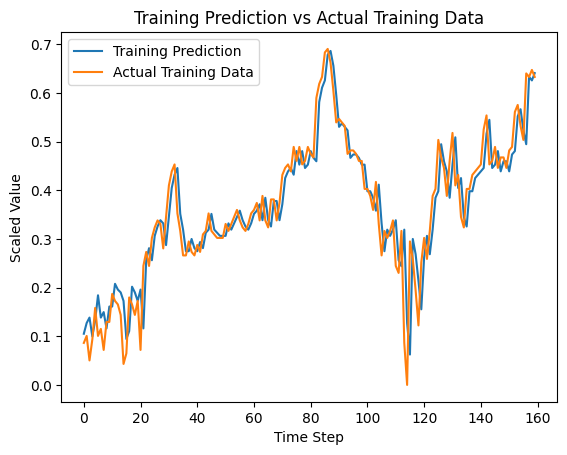

In [18]:
# Plot hasil prediksi pada data training
plt.plot(trainPredict, label='Training Prediction')
plt.plot(trainY, label='Actual Training Data')
plt.title('Training Prediction vs Actual Training Data')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

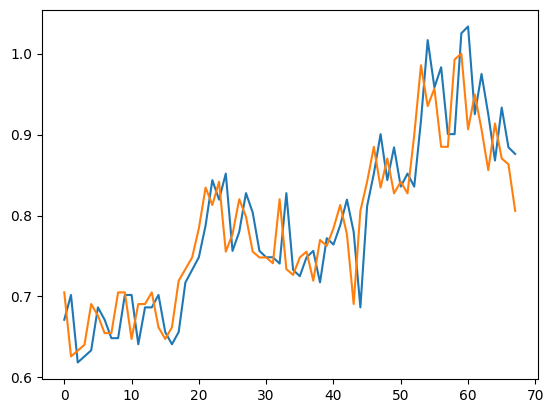

In [19]:
# Plot hasil prediksi pada data testing
plt.plot(testPredict)
plt.plot(testY)
plt.show()